# Introduction

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F1_introduction.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Basics in linear algebra and calculus
- Basics in python

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Definitions: bias, variance, irreducible error, underfitting, overfitting, classification
- Data manipulation in python: numpy, matplotlib, pandas
- First steps with scikit-learn

</div>

## The IPCC report


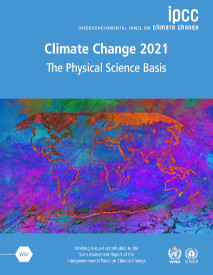

The working group 1 (WG1) of the Intergovernmental Panel on Climate Change (IPCC) is a group of scientists who assess and quantify climate change. In order to provide an accurate description of the future climate, they use numerical models also known as Climate Model Intercomparison Project (CMIP).

- There are many components in a climate model: the main parts are the ocean and the atmosphere which predict the evolution of both media on predefined grid points. In order to get an accurate prediction of the CO2 concentration, one also need to have a proper model for living ecosystems and biogeochemical cycles. In polar regions there are specific models for ice sheets and sea ice.

- There are several scenarios (Shared Socioeconomic Pathways) ranging from very optimistic (SS1: sustainability) to (very) pessimistic (SS5: Fossil fuel development)

- In CMIP6, there are over 100 full blown models that attempt to propose the most reliable forecast for each of these scenarios [Balaji et. al (2018)](https://gmd.copernicus.org/articles/11/3659/2018/gmd-11-3659-2018.pdf)

Dealing with all model output is not a sinecure. Thousands of scientists collaborated to share their data, produce consistent diagnositcs and plot an overview of what all these models are telling us. The main point of doing this is to **reduce the uncertainty**. It is indeed very important to know:
- how much of global warming has human origins (understand the climate system)
- if tipping points will be crossed in 2030 or 2050 in order to best anticipate the changes (do predictions).

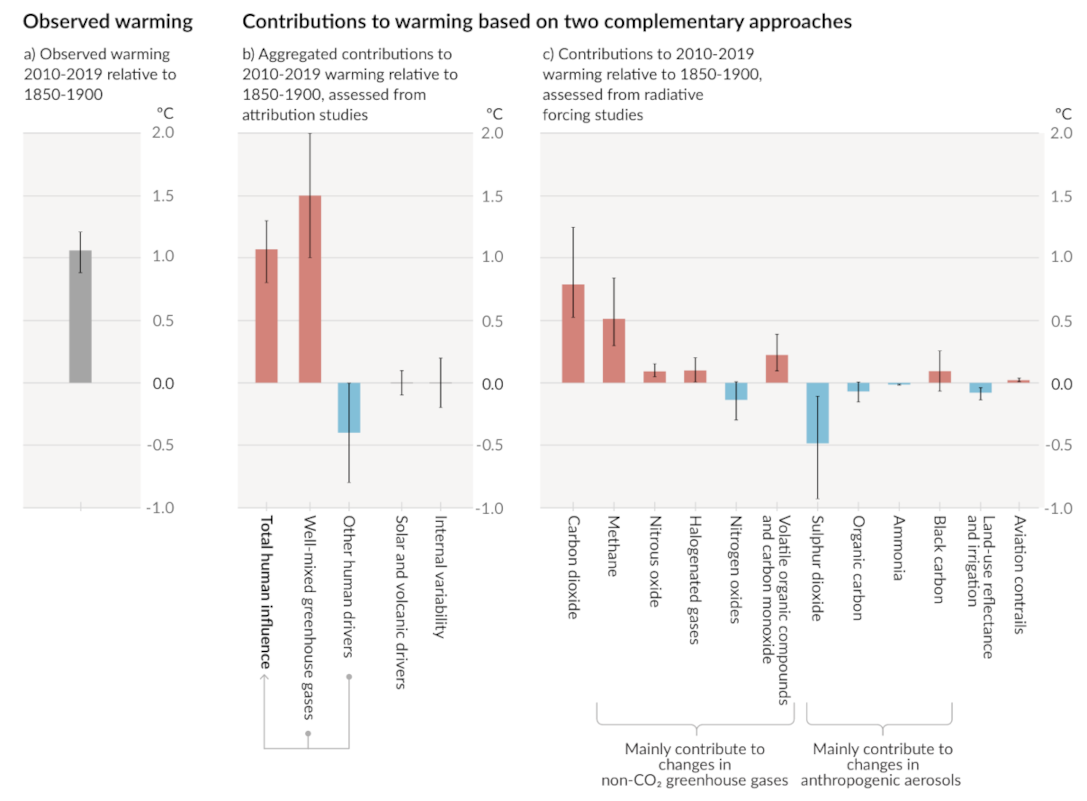
Figure SPM2 ([IPCC repport](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM.pdf))

The figure above is a summary of the causes of the 1 degree temperature change since the industrial revolution. In this problem, there is one **output variable** (global temperature) and many **input variables** (CO2, methane, etc...). We sometimes call the input variable the independant variables and the output variable the dependant variable as the latter is function of the input variables.

The problem highlighted in the figure corresponds to a typical machine learning problem where we try to find a function that maps the input variables onto the output variables.

> ***Question***
> - How much data was produced to construct this repport?

We will try to get a proxy for the amount of data produced with the number of pages in this report. Below is a plot with the number of pages for each Assesment Report (AR) between 1990 and 2013. I added the *[Charney Report (1979)](https://en.wikipedia.org/wiki/Jule_Gregory_Charney#Charney_Report)* which is considered a precursor to the IPCC reports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '# of pages')

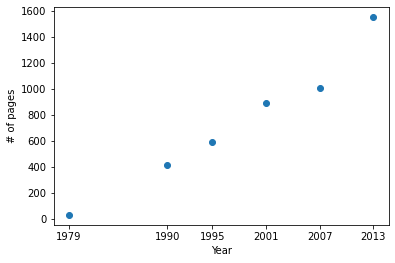

In [2]:
years = np.array([1979, 1990,1995,2001,2007,2013])
pages = np.array([30, 414, 588, 893, 1007, 1552])

plt.plot(years,pages,'o')

plt.xticks(years,years)
plt.xlabel("Year")
plt.ylabel("# of pages")

The number of pages is steadily increasing for each Assesment Report. This is consistent with the way global models evolved over time. This is also consistent with the increase of the spatial resolution: we have indeed more data to assess the regionality of climate change. Let's try to fit a linear model to see if we can predict the number of pages of the AR6 report (2021).

The idea of linear regression is that we suppose that there exist a linear relationship between the year of the Assesment Report and the number of pages

\begin{equation}
y = \alpha x + \beta\, ,
\end{equation}
with $y$ the number of pages and $x$ the year. $\alpha$ is called the **regression coefficient** and $\beta$ is called the **intercept**. In the next chapter, we are going to study linear regression and see how we can find $\alpha$ and $\beta$.

Although linear regression seem extremely simple, it is still regarded as the model of **maximum interpretability**. In fact, the sign and the magnitude of $\alpha$ tell you how $y$ varies with $x$ in an unambiguous way and you can easily confront this result to your physical intuition.

Latter on, we will study neural networks with millions of parameters which may give a better prediction for $y$ but it is often the case that we don't know why.

Needless to say that it is important to try **simple methods first** before going to more complicated algorithms... Even if simple models are sometimes [too simple](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

According to the linear fit, there should be 1741 pages in the AR6 report


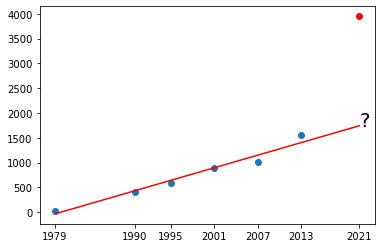

In [3]:

#linear regression with numpy
A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, pages, rcond=None)[0]

plt.plot(years,pages,'o')

# add AR6 report
years = np.append(years, [2021])
pages = np.append(pages, [3949])

plt.plot(years, m*years + c, 'r', label='Fitted line')
plt.xticks(years,years)

plt.text(2021,m*2021 + c,"?", size=20)
plt.plot(years[-1],pages[-1],'or')
print("According to the linear fit, there should be {0:.0f} pages in the AR6 report".format(m*2021 + c))

In fact there are 3949 pages in AR6.
> ***Question***
> - What could have possibly gone wrong in our estimate of the number of pages for 2021?

In this problem we have one input variable (year) and one output variable (number of pages). Of course, there could have been more input variables to get a more accurate prediction.

> ***Question***
> - Propose several other input variables one could use to get a better estimate for the number of pages in the IPCC report.



Let us write the input variables with the letter $X$ and the output variable with the letter $Y$.
Moreover, there are multiple observations of each input variable. We will gather all the observations of all input variables in a matrix $\mathbf X$ with $n$ rows (for each observation) and $p$ columns (for each type of variable):

\begin{align}
 \mathbf{X} &= \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p}\\
    x_{21} & x_{22} & \cdots & x_{2p}\\
    \vdots & \vdots &        & \vdots\\
    x_{n1} & x_{n2} & \cdots & x_{np}\\
  \end{bmatrix}
\end{align}

For now we restrict our analysis to problems where there is a single output variable.

> ***Question***
> - With this convention, is this output variable a row vector or a column vector?

In machine learning problems, the task is to propose an estimate of the function that predict the output variable based on the known input variables. This is based on our intuition that there *is* a relationship between the input and output variables in the form of

\begin{equation}
Y = f (X) + \epsilon\, ,
\end{equation}
with $f$ the function that we will try to guess and $\epsilon$ is an **Irreducible error** that can have multiple origins.

> ***Questions***
> - Give several sources of errors for the problem we are considering
> - If you consider enough input variables, can you get rid of $\epsilon$?

The above equation is the *ground truth*, however we usually don't know $f$. Our task is to propose an estimate of $f$ based on the sample observation that we have.  Because our observations are limited, we can only approximate $f$: we will denote this approximate function with a *hat* and write our prediction as

\begin{equation}
\hat Y = \hat f(X)
\end{equation}

Note that this equation is **deterministic**: there is no random noise in the right hand side. In fact, because we want to provide the best estimate, there is no need to add noise in the prediction: that would necessarily give a worse prediction for $Y$ (cf. next chapter)

We can then use $\hat f$ to
- make predictions
- understand the relationship between input and output variables

These two objectives are at the heart of machine learning techniques.

### Types of errors

<div class="alert alert-block alert-success">
    
The notion of prediction is key in machine learning. Consider the following example: suppose we want to understand the dynamics of the atmospheric boundary layer and more precisely characterize the amount of turbulence based as a function of height and mean wind field. We are going to set up a field campain and do measurements. At the observation site, we will we will place a couple of sensors at different heights, do measurements for a month and then go back to the lab and analyze the data. Based on this data set, we will propose a law

\begin{equation}
\hat T = \hat f(z,|u|)\, ,
\end{equation}
where $T$ is a scalar that indicates how turbulent the flow is. We can then use this function $\hat f$ to parameterize unresolved processes in climate model
    
</div>

> ***Question***
> 
> - How do we know that $\hat f$ is the correct fit? 
> - If we do a second field campain and take more measurements, will we get a new estimate for $\hat f$?
> - What if we use more precise instruments to do the measurements?


So the function $\hat f$ is not perfect. One way to quantify the uncertainty on $\hat f$ is to divide the data set in a ***training data set*** and a ***testing data set***. We use the training data set to compute $\hat f$ and with the help of a metric, we can give a score to that $\hat f$ to compute how well it performs to reproduce the output variable. Example of such metric is the squared error

\begin{equation}
L = E(Y-\hat Y)^2
\end{equation}

Then to validate the model, we compute the same score on the testing data set. If the score is the same than for the training data set, then the model is not specific to the training data set and can be generalized to more data. If the score is (significantly) higher, then that means the model is ***overfitting*** the data. In the exemple below, we propose to fit the data with the [Cubic Spline](https://en.wikipedia.org/wiki/Spline_(mathematics)). The score of the fit on the traning data is excellent because the error on each point is zero. However, we have a feel that the model will perform poorly on the testing data: it is overfitting the data. We will prove this in the next chapter. 

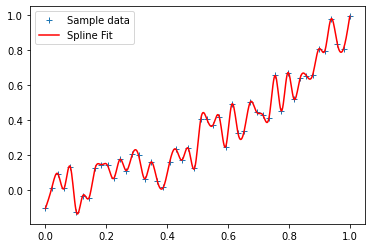

In [4]:
from scipy.interpolate import CubicSpline
nx = 50

x = np.linspace(0,1,nx)
y = x**2 + 0.3*(np.random.rand(nx) - 0.5)

cs = CubicSpline(x,y,bc_type='natural')

xp = np.linspace(0,1,500)

plt.figure()
plt.plot(x,y,'+', label='Sample data')
plt.plot(xp, cs(xp), 'r', label='Spline Fit')

plt.legend()


To measure how much the model is overfitting the data we introduce the ***Variance error***: a model with high variance is overfitting the data.

On the other hand, if the model we are trying to fit does not have enough degrees of freedom, there is a risk that we are ***underfitting*** the data, which is characterized by the ***Bias error***. We say a model is biased when it is not able to capture the correct relationship between features and target output. In the exemple below, we are trying to fit a constant where the relationship betwenn the input and output variables is in fact quadratic. The model is biased because there will always be an offset in the prediction of the output variable.


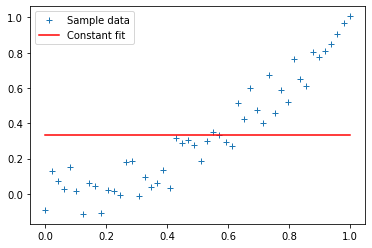

In [5]:
nx = 50

x = np.linspace(0,1,nx)
y = x**2 + 0.3*(np.random.rand(nx) - 0.5)

y_me = np.mean(y)

plt.figure()
plt.plot(x,y,'+', label='Sample data')
plt.plot(x, 0*x + y_me, 'r', label='Constant fit')
plt.legend()

The last type of error we are going to deal with is the ***Irreducible error***. This error corresponds to the random numbers that we added in the example above. You may see this error as the precision of your instrument or as missing physics in your model. This can be due to chaotic perturbation of your system. This type of error is not predictable.

<div class="alert alert-block alert-info">
    <b>Summary</b>
    
- There are 3 types of errors: Bias, Variance and Irreducible errors. Our goal will be to find model that have both the lowest bias and lowest variance.
</div>

## Introduction to classification

To Be finished

<div class="alert alert-block alert-info">
    <b>Definitions</b>
    
- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs (labelled data set). The key aspect of supervised learning is that there exists a training data set with labelled data.
- on the other hand, [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) corresponds to the problem of guessing patterns in an unlabelled data set

</div>

## Linear algebra and calculus

Throughout this class we adopt the following conventions:

- Vectors are noted with bold lower case letters and are represented as columns

\begin{align}
 \mathbf{x} &= \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
  \end{bmatrix}
\end{align}

- Matrix are noted with capital letters

\begin{align}
 \mathbf{A} &= \begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1p}\\
    a_{21} & a_{22} & \cdots & a_{2p}\\
    \vdots & \vdots &        & \vdots\\
    a_{n1} & a_{n2} & \cdots & a_{np}\\
  \end{bmatrix}
\end{align}

The scalar product between two vectors $\mathbf{x}$ and $\mathbf{y}$ is given by
\begin{equation}
\mathbf{x}\cdot \mathbf{y} = \mathbf{x}^\top \mathbf{y} = \sum_i x_i y_i
\end{equation}

The matrix vector multiplication is
\begin{align}
\begin{bmatrix}
\mathbf{A}\mathbf{x}
\end{bmatrix}_i = \sum_{j} A_{ij} x_j
\end{align}

We then adopt the "Jacobian" convention or [Numerator layout](https://en.wikipedia.org/wiki/Matrix_calculus#Layout_conventions) for wich the gradient of a scalar function $f(\mathbf{x})$ is a row vector. 

\begin{align}
  \frac{\partial f}{\partial \mathbf{x}} &= \nabla_\mathbf{x} f &= \begin{bmatrix}
    \frac{\partial f}{\partial x_1} &
    \frac{\partial f}{\partial x_2} &
    \cdots                          &
    \frac{\partial f}{\partial x_n}
  \end{bmatrix}.
\end{align}

With this convention, partial derivative of vectors with respect to scalars are column vectors:
\begin{align}
  \frac{\partial \mathbf{x}}{\partial y} &= \begin{bmatrix}
    \frac{\partial x_1}{\partial y} \\
    \frac{\partial x_2}{\partial y} \\
    \cdots                          \\
    \frac{\partial x_n}{\partial y}
  \end{bmatrix},
\end{align}

and vector derivative of vectors are the Jacobian matrix

\begin{align}
  \frac{\partial \mathbf{y}}{\partial \mathbf{x}} &= \begin{bmatrix}
    \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n} \\
    \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n} \\
    \vdots                            & \vdots                            & \ddots & \vdots \\
    \frac{\partial y_p}{\partial x_1} & \frac{\partial y_p}{\partial x_2} & \cdots & \frac{\partial y_p}{\partial x_n}\\
  \end{bmatrix}.
\end{align}

Such that the $(i,j)$th element is
\begin{align}
\begin{bmatrix}
\frac{\partial \mathbf{y}}{\partial \mathbf{x}} 
\end{bmatrix}_{ij} = \frac{\partial y_i}{\partial x_j} 
\end{align}

With these conventions, we recall the following rules (with $\mathbf{A}$ and $\mathbf{a}$ not a function of $\mathbf{x}$, and $\mathbf{u}$, $\mathbf{v}$ funtions of $\mathbf{x}$):


\begin{equation}
\frac{\partial \mathbf{A}\mathbf{x}}{\partial \mathbf{x}} = \mathbf{A}
\end{equation}



Product:

\begin{equation}
\frac{\partial \mathbf{u}^\top \mathbf{v}}{\partial \mathbf{x}} = \mathbf{u}^\top \frac{\partial \mathbf{v}}{\partial \mathbf{x}} + \mathbf{v}^\top\frac{\partial \mathbf{u}}{\partial \mathbf{x}}
\end{equation}

The chain rule 

\begin{equation}
\frac{\partial \mathbf{f(g(x))}}{\partial \mathbf{x}} = \frac{\partial \mathbf{f(g)}}{\partial \mathbf{g}}\frac{\partial \mathbf{g(x)}}{\partial \mathbf{x}} 
\end{equation}

*Note that the order in which the operators appear matters for matrix multiplication*.

>  ***Question***: Can you derive the following two formulas?
> - \begin{equation}
\frac{\partial \mathbf{a}u}{\partial \mathbf{x}} = ?
\end{equation}
> - \begin{equation}
\frac{\partial \mathbf{A}\mathbf{u}}{\partial \mathbf{x}} = ?
\end{equation}

## Introduction to python

Python is a popular computer language. We will use it along with 4 libraries: numpy for array handeling, pandas for time series, scikit-learn for machine learning tools and matplotlib for ploting. There are *a lot* of ressources on the web: the user manuel remains the primary location where you should look if you are looking for documentation about a specific function. https://stackoverflow.com/ is also a good source of information since many people before you have already had the same question as you. A good intro to numpy: https://sebastianraschka.com/blog/2020/numpy-intro.html

Even though python is a great language, don't forget that it is an [Interpreted language](https://en.wikipedia.org/wiki/Interpreter_(computing)). That means that python can be very slow. For this reason you shoud 

- Avoid loops
- Rely on existing libraries when available

Indeed, most modern libraries deffer the heavy lifting part to compiled bits of codes which typically run much faster than your own implementation.

### Numpy for array handling

Numpy is the core library when it comes to manipulating "dense" arrays of numbers and you should always use it instead of raw python lists. Numpy also comes with a couple of linear algebra routines to perform basic operations (matrix multiplication, linear systems, eigenvalue solver). However for large-scale application (and sparse matrices) we will use different libraries (like scipy).

In [6]:
import numpy as np

Vectors are first declared as a list of number and are then converted to numpy arrays. Note that python does not make the difference between row vectors and column vectors: all vectors are treated as rows.

In [7]:
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Matrices are declared as an array of arrays in a similar way as vectors. Note that python is case sensitive

In [8]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In order to manipulate row or column vectors, one must add a new dimension as shown below:

In [9]:
x_col = x[:,None]
print(x_col)

[[1]
 [2]
 [3]]


Matrix multiplication can be achieved with `np.dot`, `np.matmul`, `@` or `np.einsum`.
> ***Question***
> - Pick the one you prefer to compute $\mathbf A \mathbf x$, $\mathbf x \mathbf x^\top$, and $\mathbf x^\top \mathbf x$.

- Hint: You can always check the dimensions of your array with the method `.shape`.
- Hint2: Einsum is the most advanced function but also the most complicated. [This tutorial](https://ajcr.net/Basic-guide-to-einsum/) will tell you more about it

In [10]:
# your code here

You can access the first element of an array with `x[0]` and the last element with `x[-1]`. You can also select a subset using slices like `x[0:2]` (or `x[:2]`). Be careful that the last index of the slice is not part of the subset.

> ***Question***
> - Can you select the last two element of the vector $\mathbf x$ with negative indices?

In [11]:
# your code here

Numpy comes with the standard math function `np.exp`, `np.sqrt`, `np.sin`. Each of these functions applied to an an array is applied element-wise. For instance `A**2` raises each element of `A` to the power of 2. The function `np.mean` can be applied to the whole array or to each variable independantly or to  observations. 

> ***Question***
> - Take a look at the documentation of the function that computes the covariance [`np.cov`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html). Is the layout convention the same as the one we adopted in this class? What argument may be useful here?

#### Broadcasting

In python, we can add, subtract, multiply, (etc.) arrays elementwise. In this context arrays have to be of the same size. But when we do `A+1`, we add the scalar `1` to each element of the array `A`: this type of operation is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). 

> ***Question***
> - Check the broadcasting rules and add `x` to each column of `A`

In [12]:
# your code here

#### Generating arrays

Empty arrays can be generated with `np.zeros`. We can also generate array with [random numbers](https://numpy.org/doc/stable/reference/random/index.html). The most useful functions are `np.random.rand` (unifrom distribution) and `np.random.randn` (normal distribution)

> ***Question***
> - Generate an array `v` of 2 variables $v_1$ and $v_2$ with 500 observations following the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) $\mathcal N (2,25)$ for $v_1$ and $\mathcal N (1,1)$ for $v_2$. Check your result by computing the mean and covariance matrix.
> - ***(Optional)***: Adjust the number of observations and develop the correct diagnostic to illustrate the [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

In [13]:
# your code here

As you just saw, $v_1$ and $v_2$ are not correlated. Let's apply the linear transformation
\begin{align}
w_1& = \cos \theta v_1 - \sin \theta v_2\\
w_2& = \sin \theta v_1 + \cos \theta v_2
\end{align}
That you can also write as
\begin{equation}
\mathbf{w}^\top = \mathbf{R}\mathbf{v}^\top
\end{equation}
with $\mathbf R$ the rotation matrix
\begin{align}
 \mathbf{R} &= \begin{bmatrix}
    \cos \theta & -\sin \theta \\
    \sin \theta & \cos \theta
  \end{bmatrix}
\end{align}

> ***Question***
> - Can you guess what the covariance between $w_1$ and $w_2$ will be? [Hint](https://en.wikipedia.org/wiki/Variance)
> - Check it numerically with $\theta=\pi/3$

In [14]:
# your answer here

### Matplotlib for plotting

To vizualize data, matplotlib is the reference tool and it is necessary to know the basics. Matplotlib is also what runs behind the scene of high level python libraries (pandas, xarray) and so knowing the basics will also be useful there.

In [15]:
import matplotlib.pyplot as plt

> ***Question***
> - Can you vizualize the data set `V` that we generated earlier. you can either pass the two variables to the function `plt.plot` in order to plot $v_2$ as a function of $v_1$ or we can use the function `plt.scatter`. Don't forget to 
>    - adjust the type and size of markers [Hint](https://matplotlib.org/stable/api/markers_api.html)
>    - adjust the axis so that both axis are equally stretched [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html).
>    - add labels [Hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html)

In [16]:
#your answer here

Let's analyze the probability density function (pdf) of this data set. the function [`np.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) provides a discrete estimate of the pdf along a given dimension

> ***Question***
> - Adjust the number of bins `np.histogram` to compute and plot an estimation of the pdf of $w_1$ and $w_2$.
> - ***(Optional)*** Compare it with the analytical probability density function of $w_1$ and $w_2$?



In [17]:
# your code here

We can also get a quick overview of the statistical distribution of the data with [box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

> ***Question***
> - What is the meaning of a box plot?
> - Try it on $w_1$

> ***Question (optional)***
> - Use `np.histogram2d` to compute the 2-dimensional pdf
> - On a single plot, superimpose the cloud of points and the contour lines of the pdf.

In [18]:
# your answer here

### Pandas for advanced array manipulation

Compared to numpy which already handles arrays of numbers, Pandas essentially handles **metadata**. This will allow you to use predefined functions in pandas especially when it comes to time series manipulations. 

Pandas has a lot of other nice features like

- Intuitive handeling of missing data (NaN)
- Input/output in many formats
- Simplified plotting procedures (labels, axes, etc. are added automatically)
- Better managment of the memory

We are going to explore the basic functionalities of pandas with the historical CO2 measurements taken at Mona Loa also known as the [Keeling curve](https://en.wikipedia.org/wiki/Keeling_Curve). The data can be downloaded at [scrippsco2.ucsd.edu](http://scrippsco2.ucsd.edu) and we are going to analyze the daily output.

Take a moment to inspect the file that is located here `data/daily_in_situ_co2_mlo.csv` (either use a text editor or navigate within jupyter to open the file). Read the header to understand what is the data set about (you may have to investigate more to know about the units). 

> **Question**
> - Why is there NaN in the data set?

In [19]:
import pandas as pd


We are going to use the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to import the data in python. It is very important to do a clean import of the data so that we can work efficiently afterwards. Pay extra attention to 
- the commented part in the header (hint: `comment`)
- add a name to each column. Use the names **year**, **month**, **day** for the corresponding columns. This way, pandas will directly recognize what they are (hint: `names`)
- pandas handles spaces in cvs files in a very specific way: you may need to adjust its behavior with `skipinitialspace`.

Use `pd.read_csv` to load the content of `data/daily_in_situ_co2_mlo.csv` into a DataFrame called `df`.

In [20]:
#your answer here

To access your data, you will need to know the metadata, i.e. the label of each column in the csv file (in this case provided by yourself). You can get a quick overview of your data by typing `df.head()` or `df.describe()`. You will see that the Dataframe `df` can be treated like a spreadsheet with labeled columns and entries for each column. You can view the labels with `df.columns` and the rows indices with `df.index`. Make sure you understand the type of each column of the dataset with `df.dtypes`. 

In [21]:
#look at the data set here

You can select a column of the DataFrame by passing one name to `df` like `df["year"]`. You can also select multiple columns by passing a list of names `df[["year", "month"]]`. To select specific rows, you need to use the method `.loc[]` to which you need to provide the index. In our case we did not provide labels for the indices so pandas automatically numbered the rows with a simple counter.

> ***Question***
> - Create a new DataFrame that contains only the first 100 entries and with the columns "year" and "co2" only.

In [22]:
# your answer here

One killer feature of pandas is the way it handles time series. In order to use the full potential of such tool, one need to change the index to a date that is recognized by pandas. We use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to combine the information in the year, month and day columns of the dataframe. `pd.to_datetime` handles various format as input and you should be careful to use the correct input format. However, because you carefully chose the name of the columns, you can directly assemble the corresponding columns to create a new object. You can follow the method in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#assembling-datetime-from-multiple-dataframe-columns) to re-allocate `df.index` to a `datetime` type variable. Henceforth, we will use `df.index` to access the time dimension.

In [23]:
#your answer here

> ***Question (Optional)***
> - Note that one could have done this operation directly while reading the data. Use `parse_dates` in `pd.read_csv` to create a datetime object in `df`. Try it.

Now `df.index` contain [Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html)s. You can quickly access the day, month, year of the reccords by using `df.index.day`, `df.index.month` `df.index.year` (etc. see documentation). You can also construct time intervals (or [timedetla](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html)s) by subtracting two timestamps

> ***Question***
> - Subtract the first index to the last index to know how many days are in this data set

In [24]:
#your answer here

Pandas has built-in plotting features that are based on matplotlib. Since you now master matplotlib, you will find it very easy to plot data within pandas. 

> ***Question***
> - Plot the CO2 time series as a function of time. (Hint: select the column of interest in df and simply apply the method `.plot()`)

In [25]:
# your answer here

The CO2 curve is increasing. This is not really a surprised if you followed the news lately. However, we also notice wiggely patterns superimposed to this trend. Are we looking at noisy data are does it have a physical meaning?

> ***Question***
> - In order to get a closer look, can you plot only 2 years of the CO2 time series between Jan 1st 2000 and Jan 1st 2002?

In order to achieve this, you need to select the data for wich `df.index >= '2000-01-01'` and `df.index <= '2002-01-01'`.

In [26]:
#your answer here

So there seem to be a lot of variability and many missing data in this data set. We can try to average all available data for each single year that we have. That way we will probably see a smoother curve. The [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function is here to create a new time series with the desired sampling frequency. The accronym for standard time intervals are listed in the [Time series documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). You need to either add the method `.mean()` or `.sum()` to the resampled data to indicate how to treat the data in the resampling interval.

> ***Question***
> - Plot the yearly average evolution of the CO2 concentration.

In [27]:
#your answer here

These wiggles are not random but are the actual annual cycle of the data.
> ***Question (Optional)***
> - Use the method `.groupby` to plot the annual cycle
> - Discuss the physical origin of this anual cycle

In [28]:
#your answer here

### Scikit-learn for data analysis

[Scikit-learn](https://scikit-learn.org/) will be our toolbox for all statistical analysis. It provides the most popular machine learning algorithm, is well documented and has an active user community. Scikit learn does not work well with missing data. So in order to have a smooth transition between pandas and scikit-learn, it is convenient to create a copy of your DataFrame without any `NaN`. Make sure you use (and understand) the [`.copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) method to create the new array because we are going to make modification to this new DataFrame. You can call this new DataFrame `dfv`.

In [29]:
#your answer here

Because we cannot do a linear regression with dates as indices, we need to create an additional column that contains the day number since the begining of the dataset. Remember how we worked with timedelta (and broadcasting) above?

> ***Question***
> - Can you create this new column and name it `counter`?

*Be careful that this new variable must have dtype int (or float) and not a timedelta. (Hint: look at the [attributes of timedelta](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html#attributes))*

In [30]:
#your answer here

We are now ready to use the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.

In [31]:
from sklearn.linear_model import LinearRegression

We are first going to [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) the data. As explained in the documentation, this function takes at least two arguments: the predictors and the observations. Predictors must be a 2d array of shape (n_samples, n_features), **even if there is only ONE feature**. One simple way to achieve this is to select a list of only one variable in the DataFrame (i.e. `dfv[["counter"]]`, note the usage of double brackets here).

> ***Question***
> - Perform the linear regression and put the output in the variable `reg`.

In [32]:
#your answer here

> ***Question***
> - What is the value of the regression coefficient?
> - What is its physical meaning?

In [33]:
#your answer here

> ***Question***
> - Use the method `.predict` to construct the predicted value at all observation times and add it to the `dfv` DataFrame.

In [34]:
#your answer here

> ***Question***
> - Plot the observed value along with your prediction on a single plot.

In [35]:
#your answer here

It is now super easy to compute the co2 growth rate in ppm/year for several time periods.
> ***Question***
> - Perform 2 linear regressions: one between 1960 and 1980 and one between 2000 and 2020 and compare how the growth rate evolved over time.
> - Can you give an estimate of the CO2 concentration in 2050?


***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>